# 고객데이터 전처리

# (1) 고객데이터 소개

## (1-1) 조건
1. 데이터기간 : 2022.12(M1) ~2023.3(M4) 총 4개월
2. 자산내역 : M1,M2,M3,M4
3. 거래내역 접속내역 -> 월별 초순/중순/하순 -> M1_1,M1_2,M1_3,M1_4 ,,,,
<br/>

## (1-2) 수익률
<p style="font-style:italic">!해외주식 데이터도 포함!</p>
<P style="font-weight:bold ;font-size:15px;font-style:italic;background-color:orange;text-align:center">수익률 = (AST_EVAL - AST_PCHS) / AST-PCHS * 100</P>
<br/>

## (1-3) columns name
1. HLD_TR_RATIO_M1,HLD_TR_RATIO_M2,HLD_TR_RATIO_M3,HLD_TR_RATIO_M4
<br>: 2022년 12월 기준, 이전 6개월(22.6 ~ 22.11) 매도액 중 매수 후 1년 이내 매도액 비중
2. CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4
<br>: 월 말일 기준 현금성 자산금액
3. DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4
<br>: 월 말일 기준 국내 보유 주식 자산 평가액
4. DMST_AST_PCHS_M1,DMST_AST_PCHS_M2,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4
<br>: 월 말일 기준 국내 보유 주식 매입액
5. OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4
<br>: 월 말일 기준 해외 보유 주식 자산 평가액
6. OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
<br>: 월 말일 기준 해외 보유 주식 매입액


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#현재 working directory 경로 확인
#코드 실행자의 파일 위치에 따라 달라짐
os.getcwd()

'/Users/yusolcho/Desktop/analysis/code/pre-processing/customer'

In [3]:
cs_data= pd.read_csv("../../../data/mirae/cs_data.csv")
cs_data

/var/folders/4t/dyhc70gd7zjdwxdh7x7f77240000gn/T/ipykernel_93495/1886507499.py:1: DtypeWarning: Columns (31,32,33,62,63,64,93,94,95,124,125,126,221,389) have mixed types. Specify dtype option on import or set low_memory=False.
  cs_data= pd.read_csv("../../../data/mirae/cs_data.csv")


,AGE_TCD,MT_EP_EXIST_YN,LST_BEST_EA,LST_BEST_YM,DMST_FST_BUY_YM,DMETF_FST_BUY_YM,OVST_FST_BUY_YM,OVETF_FST_BUY_YM,DMST_FIN_BUY_YM,DMETF_FIN_BUY_YM,...,HTS_DYS_M3_3,CONN_DYS_M4_1,MTS_DYS_M4_1,HTS_DYS_M4_1,CONN_DYS_M4_2,MTS_DYS_M4_2,HTS_DYS_M4_2,CONN_DYS_M4_3,MTS_DYS_M4_3,HTS_DYS_M4_3
0,50,Y,3.000000e+08,202206,202007.0,202111.0,NaN,NaN,202205.0,202208.0,...,NaN,10.0,10.0,NaN,10.0,10.0,NaN,11.0,11.0,NaN
1,60,N,2.200000e+08,201711,201912.0,NaN,NaN,NaN,202210.0,NaN,...,NaN,8.0,7.0,3.0,4.0,4.0,NaN,9.0,9.0,1.0
2,40,N,4.400000e+07,202206,202105.0,NaN,202111.0,202111.0,202211.0,NaN,...,NaN,9.0,9.0,NaN,9.0,9.0,NaN,10.0,10.0,NaN
3,40,Y,2.100000e+08,202201,201912.0,202003.0,202009.0,202101.0,202204.0,202008.0,...,NaN,1.0,NaN,1.0,3.0,NaN,3.0,2.0,NaN,2.0
4,50,N,5.100000e+07,202209,202207.0,NaN,NaN,NaN,202209.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803303,60,N,3.400000e+07,202209,202001.0,NaN,NaN,NaN,202211.0,NaN,...,4.0,7.0,1.0,7.0,6.0,NaN,6.0,8.0,1.0,8.0
803304,50,N,1.600000e+08,202204,201912.0,NaN,NaN,NaN,202211.0,NaN,...,NaN,7.0,7.0,NaN,6.0,6.0,NaN,10.0,10.0,NaN
803305,40,Y,1.100000e+09,202104,201912.0,NaN,NaN,NaN,202211.0,NaN,...,NaN,9.0,9.0,NaN,8.0,8.0,NaN,11.0,11.0,NaN
803306,60,N,1.700000e+08,202108,201912.0,NaN,NaN,NaN,202207.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cs_data.head(10)

,AGE_TCD,MT_EP_EXIST_YN,LST_BEST_EA,LST_BEST_YM,DMST_FST_BUY_YM,DMETF_FST_BUY_YM,OVST_FST_BUY_YM,OVETF_FST_BUY_YM,DMST_FIN_BUY_YM,DMETF_FIN_BUY_YM,...,HTS_DYS_M3_3,CONN_DYS_M4_1,MTS_DYS_M4_1,HTS_DYS_M4_1,CONN_DYS_M4_2,MTS_DYS_M4_2,HTS_DYS_M4_2,CONN_DYS_M4_3,MTS_DYS_M4_3,HTS_DYS_M4_3
0,50,Y,300000000.0,202206,202007.0,202111.0,NaN,NaN,202205.0,202208.0,...,NaN,10.0,10.0,NaN,10.0,10.0,NaN,11.0,11.0,NaN
1,60,N,220000000.0,201711,201912.0,NaN,NaN,NaN,202210.0,NaN,...,NaN,8.0,7.0,3.0,4.0,4.0,NaN,9.0,9.0,1.0
2,40,N,44000000.0,202206,202105.0,NaN,202111.0,202111.0,202211.0,NaN,...,NaN,9.0,9.0,NaN,9.0,9.0,NaN,10.0,10.0,NaN
3,40,Y,210000000.0,202201,201912.0,202003.0,202009.0,202101.0,202204.0,202008.0,...,NaN,1.0,NaN,1.0,3.0,NaN,3.0,2.0,NaN,2.0
4,50,N,51000000.0,202209,202207.0,NaN,NaN,NaN,202209.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
5,50,N,210000000.0,202104,202101.0,NaN,NaN,NaN,202211.0,NaN,...,NaN,10.0,10.0,NaN,9.0,9.0,NaN,11.0,11.0,NaN
6,40,N,260000000.0,202009,202001.0,NaN,NaN,NaN,202211.0,NaN,...,NaN,7.0,7.0,NaN,9.0,9.0,NaN,8.0,8.0,NaN
7,30,N,76000000.0,202208,202108.0,202109.0,202108.0,202109.0,202211.0,202211.0,...,NaN,10.0,10.0,NaN,10.0,10.0,NaN,10.0,10.0,NaN
8,40,N,260000000.0,202104,202105.0,NaN,NaN,NaN,202211.0,NaN,...,NaN,5.0,5.0,NaN,4.0,4.0,NaN,7.0,7.0,NaN
9,20,N,11000000.0,202110,202102.0,NaN,NaN,NaN,202204.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN


In [5]:
#전체 변수명
for column in cs_data.columns: print(column)

AGE_TCD
MT_EP_EXIST_YN
LST_BEST_EA
LST_BEST_YM
DMST_FST_BUY_YM
DMETF_FST_BUY_YM
OVST_FST_BUY_YM
OVETF_FST_BUY_YM
DMST_FIN_BUY_YM
DMETF_FIN_BUY_YM
OVST_FIN_BUY_YM
OVETF_FIN_BUY_YM
DMST_TR_MONTHS_CNT
DMETF_TR_MONTHS_CNT
OVST_TR_MONTHS_CNT
OVETF_TR_MONTHS_CNT
APY_ITM_CNT
APY_FIN_YM
DAY_TR_RATIO
SWING_TR_RATIO
MONTHS_TR_RATIO
MID_TR_RATIO
HLD_TR_RATIO
YEARS_TR_RATIO
CASH_AST_M1
DMST_AST_EVAL_M1
OVST_AST_EVAL_M1
DMST_AST_PCHS_M1
OVST_AST_PCHS_M1
DMST_ITM_CNT_M1
OVST_ITM_CNT_M1
DMST_AST1_ITM_M1
DMST_AST2_ITM_M1
DMST_AST3_ITM_M1
DMST_AST1_MKT_M1
DMST_AST2_MKT_M1
DMST_AST3_MKT_M1
DMST_AST1_PCHS_M1
DMST_AST2_PCHS_M1
DMST_AST3_PCHS_M1
DMST_AST1_EVAL_M1
DMST_AST2_EVAL_M1
DMST_AST3_EVAL_M1
OVST_AST1_ITM_M1
OVST_AST2_ITM_M1
OVST_AST3_ITM_M1
OVST_AST1_MKT_M1
OVST_AST2_MKT_M1
OVST_AST3_MKT_M1
OVST_AST1_PCHS_M1
OVST_AST2_PCHS_M1
OVST_AST3_PCHS_M1
OVST_AST1_EVAL_M1
OVST_AST2_EVAL_M1
OVST_AST3_EVAL_M1
CASH_AST_M2
DMST_AST_EVAL_M2
OVST_AST_EVAL_M2
DMST_AST_PCHS_M2
OVST_AST_PCHS_M2
DMST_ITM_CNT_M2
OVST_IT

In [6]:
#필수 변수
HLD_TR_RATIO = ['HLD_TR_RATIO']
CASH_AST = ['CASH_AST_M1','CASH_AST_M2','CASH_AST_M3','CASH_AST_M4']
DMST_AST_EVAL=['DMST_AST_EVAL_M1','DMST_AST_EVAL_M2','DMST_AST_EVAL_M3','DMST_AST_EVAL_M4']
DMST_AST_PCHS=['DMST_AST_PCHS_M1','DMST_AST_PCHS_M2','DMST_AST_PCHS_M3','DMST_AST_PCHS_M4']
OVST_AST_EVAL=['OVST_AST_EVAL_M1','OVST_AST_EVAL_M2','OVST_AST_EVAL_M3','OVST_AST_EVAL_M4']
OVST_AST_PCHS=['OVST_AST_PCHS_M1','OVST_AST_PCHS_M2','OVST_AST_PCHS_M3','OVST_AST_PCHS_M4']

#수익률 변수 (수익률 계산한 값이 들어갈 변수)
RATE_OF_RETURN = ['RATE_OF_RETURN_M1','RATE_OF_RETURN_M2','RATE_OF_RETURN_M3','RATE_OF_RETURN_M4']

#필수
columns_all = HLD_TR_RATIO + CASH_AST + DMST_AST_EVAL + DMST_AST_PCHS + OVST_AST_EVAL + OVST_AST_PCHS

In [7]:
cs_data_set=cs_data[columns_all]
cs_data_set

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
0,0.0,150000.0,150000.0,130000.0,2100000.0,10000000.0,11000000.0,11000000.0,4600000.0,9700000.0,...,9700000.0,4400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,220000.0,9100000.0,7700000.0,9100000.0,78000000.0,76000000.0,70000000.0,50000000.0,100000000.0,...,75000000.0,55000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,200000.0,350.0,1200.0,1000.0,29000000.0,31000000.0,30000000.0,35000000.0,52000000.0,...,50000000.0,50000000.0,3600000.0,5600000.0,7300000.0,7300000.0,9200000.0,10000000.0,11000000.0,11000000.0
3,0.0,43000000.0,49000000.0,47000000.0,51000000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48000000.0,NaN,NaN,NaN,46000000.0,NaN,NaN,NaN
4,0.0,590000.0,600000.0,600000.0,600000.0,220000.0,240000.0,240000.0,240000.0,240000.0,...,240000.0,240000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803303,0.1,59000.0,5000000.0,77000.0,870000.0,25000000.0,28000000.0,33000000.0,31000000.0,25000000.0,...,31000000.0,31000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803304,0.2,390000.0,420000.0,400000.0,330000.0,170000000.0,180000000.0,180000000.0,190000000.0,240000000.0,...,240000000.0,250000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803305,0.1,500000.0,NaN,12000000.0,310000.0,45000000.0,64000000.0,160000000.0,150000000.0,77000000.0,...,190000000.0,130000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803306,NaN,400000.0,92000.0,110000.0,290000.0,150000000.0,140000000.0,120000000.0,130000000.0,170000000.0,...,170000000.0,170000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#각 변수의 결측치 갯수 확인
cs_data_set.isna().sum()

HLD_TR_RATIO        241569
CASH_AST_M1          27116
CASH_AST_M2          19571
CASH_AST_M3          25506
CASH_AST_M4          28725
DMST_AST_EVAL_M1     50194
DMST_AST_EVAL_M2     55724
DMST_AST_EVAL_M3     57895
DMST_AST_EVAL_M4     62616
DMST_AST_PCHS_M1     50448
DMST_AST_PCHS_M2     56082
DMST_AST_PCHS_M3     58375
DMST_AST_PCHS_M4     63271
OVST_AST_EVAL_M1    635730
OVST_AST_EVAL_M2    635650
OVST_AST_EVAL_M3    633090
OVST_AST_EVAL_M4    634569
OVST_AST_PCHS_M1    635873
OVST_AST_PCHS_M2    635791
OVST_AST_PCHS_M3    633237
OVST_AST_PCHS_M4    634733
dtype: int64

In [9]:
#전체적인 통계량 확인
cs_data_set.describe()

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
count,561739.000000,7.761920e+05,7.837370e+05,7.778020e+05,7.745830e+05,7.531140e+05,7.475840e+05,7.454130e+05,7.406920e+05,7.528600e+05,...,7.449330e+05,7.400370e+05,1.675780e+05,1.676580e+05,1.702180e+05,1.687390e+05,1.674350e+05,1.675170e+05,1.700710e+05,1.685750e+05
mean,0.176782,5.600290e+06,6.078480e+06,5.971738e+06,6.349512e+06,4.464134e+07,4.830898e+07,4.973488e+07,5.232407e+07,6.163204e+07,...,6.208879e+07,6.300106e+07,2.664867e+07,3.028267e+07,3.320211e+07,3.396037e+07,3.800611e+07,3.700044e+07,3.929911e+07,3.893609e+07
std,0.299980,1.792640e+07,1.833777e+07,1.811164e+07,1.866230e+07,8.685067e+07,9.482452e+07,9.798680e+07,1.038176e+08,1.168432e+08,...,1.182033e+08,1.198449e+08,5.840610e+07,6.683841e+07,7.446681e+07,7.601161e+07,7.878991e+07,7.708103e+07,8.272589e+07,8.163884e+07
min,0.000000,2.600000e+01,1.100000e+01,1.100000e+01,1.200000e+01,8.400000e+04,8.200000e+04,7.800000e+04,7.100000e+04,1.000000e+05,...,9.800000e+04,9.300000e+04,8.600000e+03,1.000000e+04,1.000000e+04,8.700000e+03,1.500000e+04,1.500000e+04,1.600000e+04,1.600000e+04
25%,0.000000,2.100000e+04,2.300000e+04,2.100000e+04,2.400000e+04,4.000000e+06,4.300000e+06,4.400000e+06,4.500000e+06,5.600000e+06,...,5.600000e+06,5.700000e+06,1.200000e+06,1.400000e+06,1.400000e+06,1.400000e+06,2.100000e+06,2.000000e+06,2.100000e+06,2.100000e+06
50%,0.000000,2.000000e+05,2.800000e+05,2.700000e+05,3.100000e+05,1.400000e+07,1.500000e+07,1.500000e+07,1.600000e+07,2.000000e+07,...,2.000000e+07,2.000000e+07,6.100000e+06,6.900000e+06,7.200000e+06,7.400000e+06,1.000000e+07,9.600000e+06,1.000000e+07,9.900000e+06
75%,0.200000,2.200000e+06,2.900000e+06,2.800000e+06,3.200000e+06,4.400000e+07,4.700000e+07,4.800000e+07,5.100000e+07,6.200000e+07,...,6.200000e+07,6.300000e+07,2.300000e+07,2.600000e+07,2.800000e+07,2.900000e+07,3.500000e+07,3.400000e+07,3.600000e+07,3.600000e+07
max,1.000000,1.300000e+08,1.300000e+08,1.300000e+08,1.300000e+08,5.700000e+08,6.300000e+08,6.500000e+08,6.900000e+08,7.600000e+08,...,7.700000e+08,7.800000e+08,3.900000e+08,4.500000e+08,5.000000e+08,5.100000e+08,5.200000e+08,5.100000e+08,5.500000e+08,5.400000e+08


▲ HLD_TR_RATIO를 제외한 나머지 변수에서 최솟값(min)이 '0'인 경우는 없음.

# (2) EDA
## (2-1) 결측치 확인 및 제거 (1차)
클러스터링에 사용될 변수들(HLD_TR_RATIO, CASH_AST)의 결측치 확인 및 제거함

<p style="font-size:20px; font-style:italic">(1번) HLD_TR_RATIO</p>
<br>군집화의 2개 기준(자산 규모 & 장타, 단타) 중 하나이므로 필수적인 변수임. 결측치는 제거해야 함.

In [10]:
#HLD_TR_RATIO에서 결측치 갯수 확인
cs_data_set["HLD_TR_RATIO"].isna().value_counts()

False    561739
True     241569
Name: HLD_TR_RATIO, dtype: int64

▲ 전체 데이터 중 HLD_TR_RATIO의 결측치는 약 30%임.

In [11]:
#HLD_TR_RATIO가 결측인 행만 제거
cs_data_set_clean = cs_data_set.dropna(axis=0, subset="HLD_TR_RATIO").reset_index(drop=True)
cs_data_set_clean

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
0,0.0,150000.0,150000.0,130000.0,2100000.0,10000000.0,11000000.0,11000000.0,4600000.0,9700000.0,...,9700000.0,4400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,220000.0,9100000.0,7700000.0,9100000.0,78000000.0,76000000.0,70000000.0,50000000.0,100000000.0,...,75000000.0,55000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,200000.0,350.0,1200.0,1000.0,29000000.0,31000000.0,30000000.0,35000000.0,52000000.0,...,50000000.0,50000000.0,3600000.0,5600000.0,7300000.0,7300000.0,9200000.0,10000000.0,11000000.0,11000000.0
3,0.0,43000000.0,49000000.0,47000000.0,51000000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48000000.0,NaN,NaN,NaN,46000000.0,NaN,NaN,NaN
4,0.0,590000.0,600000.0,600000.0,600000.0,220000.0,240000.0,240000.0,240000.0,240000.0,...,240000.0,240000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561734,0.0,200000.0,36000.0,72000.0,72000.0,25000000.0,27000000.0,26000000.0,27000000.0,34000000.0,...,33000000.0,33000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561735,1.0,2500000.0,5400000.0,5100000.0,4700000.0,29000000.0,28000000.0,29000000.0,26000000.0,77000000.0,...,75000000.0,75000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561736,0.1,59000.0,5000000.0,77000.0,870000.0,25000000.0,28000000.0,33000000.0,31000000.0,25000000.0,...,31000000.0,31000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561737,0.2,390000.0,420000.0,400000.0,330000.0,170000000.0,180000000.0,180000000.0,190000000.0,240000000.0,...,240000000.0,250000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style="font-size:20px; font-style:italic">(2번) CASH_AST_M4</p>
<br>4개월치의 데이터로 군집화를 할 것이므로 가장 최신 데이터인 M4를 사용함.
<br>군집화의 2개 기준(자산 규모 & 장타, 단타) 중 하나이므로 필수적인 변수임. 결측치는 제거해야 함.

In [12]:
cs_data_set_clean["CASH_AST_M4"].isna().value_counts()

False    540916
True      20823
Name: CASH_AST_M4, dtype: int64

▲ 전체 데이터 중 CASH_AST_M4의 결측치는 약 4%임.

In [13]:
cs_data_set_clean = cs_data_set_clean.dropna(axis=0, subset="CASH_AST_M4").reset_index(drop=True)
cs_data_set_clean

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
0,0.0,150000.0,150000.0,130000.0,2100000.0,10000000.0,11000000.0,11000000.0,4600000.0,9700000.0,...,9700000.0,4400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,220000.0,9100000.0,7700000.0,9100000.0,78000000.0,76000000.0,70000000.0,50000000.0,100000000.0,...,75000000.0,55000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,200000.0,350.0,1200.0,1000.0,29000000.0,31000000.0,30000000.0,35000000.0,52000000.0,...,50000000.0,50000000.0,3600000.0,5600000.0,7300000.0,7300000.0,9200000.0,10000000.0,11000000.0,11000000.0
3,0.0,43000000.0,49000000.0,47000000.0,51000000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48000000.0,NaN,NaN,NaN,46000000.0,NaN,NaN,NaN
4,0.0,590000.0,600000.0,600000.0,600000.0,220000.0,240000.0,240000.0,240000.0,240000.0,...,240000.0,240000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540911,0.0,200000.0,36000.0,72000.0,72000.0,25000000.0,27000000.0,26000000.0,27000000.0,34000000.0,...,33000000.0,33000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540912,1.0,2500000.0,5400000.0,5100000.0,4700000.0,29000000.0,28000000.0,29000000.0,26000000.0,77000000.0,...,75000000.0,75000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540913,0.1,59000.0,5000000.0,77000.0,870000.0,25000000.0,28000000.0,33000000.0,31000000.0,25000000.0,...,31000000.0,31000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540914,0.2,390000.0,420000.0,400000.0,330000.0,170000000.0,180000000.0,180000000.0,190000000.0,240000000.0,...,240000000.0,250000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## (2-2) 결측치를 '0'으로 처리
향후 전처리 과정의 용이를 위해 '1차 결측치 제거' 후 남은 결측치들을 '0'으로 처리함. 

In [14]:
#cs_data_set_clean의 각 변수별 결측치 갯수
cs_data_set_clean.isna().sum()

HLD_TR_RATIO             0
CASH_AST_M1          13586
CASH_AST_M2           7346
CASH_AST_M3           7703
CASH_AST_M4              0
DMST_AST_EVAL_M1     35915
DMST_AST_EVAL_M2     39303
DMST_AST_EVAL_M3     39583
DMST_AST_EVAL_M4     41606
DMST_AST_PCHS_M1     36112
DMST_AST_PCHS_M2     39570
DMST_AST_PCHS_M3     39920
DMST_AST_PCHS_M4     42055
OVST_AST_EVAL_M1    420813
OVST_AST_EVAL_M2    420839
OVST_AST_EVAL_M3    418756
OVST_AST_EVAL_M4    419830
OVST_AST_PCHS_M1    420928
OVST_AST_PCHS_M2    420953
OVST_AST_PCHS_M3    418878
OVST_AST_PCHS_M4    419960
dtype: int64

In [15]:
#결측치들을 '0'으로 처리한 후, 변수별 결측치 갯수
cs_data_set_0=cs_data_set_clean.fillna(0)
cs_data_set_0.isna().sum()

HLD_TR_RATIO        0
CASH_AST_M1         0
CASH_AST_M2         0
CASH_AST_M3         0
CASH_AST_M4         0
DMST_AST_EVAL_M1    0
DMST_AST_EVAL_M2    0
DMST_AST_EVAL_M3    0
DMST_AST_EVAL_M4    0
DMST_AST_PCHS_M1    0
DMST_AST_PCHS_M2    0
DMST_AST_PCHS_M3    0
DMST_AST_PCHS_M4    0
OVST_AST_EVAL_M1    0
OVST_AST_EVAL_M2    0
OVST_AST_EVAL_M3    0
OVST_AST_EVAL_M4    0
OVST_AST_PCHS_M1    0
OVST_AST_PCHS_M2    0
OVST_AST_PCHS_M3    0
OVST_AST_PCHS_M4    0
dtype: int64

In [16]:
#cs_data_set_0의 통계량 확인
cs_data_set_0.describe()

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
count,540916.000000,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,...,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05,5.409160e+05
mean,0.177359,6.493523e+06,7.168128e+06,6.953901e+06,7.422138e+06,4.751881e+07,5.093956e+07,5.251009e+07,5.499289e+07,6.517898e+07,...,6.500805e+07,6.560394e+07,6.270959e+06,7.133660e+06,7.935119e+06,8.028125e+06,8.900898e+06,8.667368e+06,9.353241e+06,9.182634e+06
std,0.299726,1.940369e+07,1.995693e+07,1.962066e+07,2.022299e+07,9.132760e+07,9.942630e+07,1.028872e+08,1.088371e+08,1.228514e+08,...,1.238990e+08,1.253372e+08,3.078568e+07,3.523522e+07,3.943832e+07,4.006747e+07,4.183451e+07,4.091847e+07,4.419137e+07,4.345320e+07
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,1.800000e+04,2.400000e+04,2.100000e+04,2.800000e+04,3.400000e+06,3.500000e+06,3.500000e+06,3.600000e+06,4.700000e+06,...,4.400000e+06,4.400000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,2.700000e+05,4.300000e+05,3.900000e+05,4.800000e+05,1.400000e+07,1.500000e+07,1.600000e+07,1.600000e+07,2.000000e+07,...,2.000000e+07,2.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.200000,3.000000e+06,4.000000e+06,3.800000e+06,4.300000e+06,4.800000e+07,5.000000e+07,5.200000e+07,5.400000e+07,6.700000e+07,...,6.600000e+07,6.700000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000,1.300000e+08,1.300000e+08,1.300000e+08,1.300000e+08,5.700000e+08,6.300000e+08,6.500000e+08,6.900000e+08,7.600000e+08,...,7.700000e+08,7.800000e+08,3.900000e+08,4.500000e+08,5.000000e+08,5.100000e+08,5.200000e+08,5.100000e+08,5.500000e+08,5.400000e+08


## (2-3) 결측치 확인 및 제거 (2차)
수익률 계산에 사용될 변수들(DMST_AST_EVAL, DMST_AST_PCHS, OVST_AST_EVAL, OVST_AST_PCHS)을 대상으로 다음과 같은 경우의 결측 데이터는 제거.
- (1) 평가액 X / 매입액 0: 평가액(EVAL)이 '0'인데, 매입액(PCHS)이 '0'이 아닌 경우
- (2) 평가액 O / 매입액 X: 평가액(EVAL)이 '0'이 아닌데, 매입액(PCHS)이 '0'인 경우

<p style="font-size:20px; font-style:italic">(CASE 1) 평가액 X / 매입액 O</p>
<br>나올 수가 없는 비정상적인 경우로, 제거해야 함.

In [17]:
#평가액(EVAL)은 없는데 매입액(PCHS)이 있는 경우
month = 0 #M1
idx_list = []

for i in range(len(cs_data_set_0)):
    if ((cs_data_set_0[DMST_AST_EVAL[month]][i] == 0) and (cs_data_set_0[DMST_AST_PCHS[month]][i] != 0)) or ((cs_data_set_0[OVST_AST_EVAL[month]][i] == 0) and (cs_data_set_0[OVST_AST_PCHS[month]][i] != 0)):
        idx_list.append(i)

cs_data_set_0.iloc[idx_list]

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4


In [18]:
#평가액(EVAL)은 없는데 매입액(PCHS)이 있는 경우
month = 1 #M2
idx_list = []

for i in range(len(cs_data_set_0)):
    if ((cs_data_set_0[DMST_AST_EVAL[month]][i] == 0) and (cs_data_set_0[DMST_AST_PCHS[month]][i] != 0)) or ((cs_data_set_0[OVST_AST_EVAL[month]][i] == 0) and (cs_data_set_0[OVST_AST_PCHS[month]][i] != 0)):
        idx_list.append(i)

cs_data_set_0.iloc[idx_list]

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4


In [19]:
#평가액(EVAL)은 없는데 매입액(PCHS)이 있는 경우
month = 2 #M3
idx_list = []

for i in range(len(cs_data_set_0)):
    if ((cs_data_set_0[DMST_AST_EVAL[month]][i] == 0) and (cs_data_set_0[DMST_AST_PCHS[month]][i] != 0)) or ((cs_data_set_0[OVST_AST_EVAL[month]][i] == 0) and (cs_data_set_0[OVST_AST_PCHS[month]][i] != 0)):
        idx_list.append(i)

cs_data_set_0.iloc[idx_list]

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4


In [20]:
#평가액(EVAL)은 없는데 매입액(PCHS)이 있는 경우
month = 3 #M4
idx_list = []

for i in range(len(cs_data_set_0)):
    if ((cs_data_set_0[DMST_AST_EVAL[month]][i] == 0) and (cs_data_set_0[DMST_AST_PCHS[month]][i] != 0)) or ((cs_data_set_0[OVST_AST_EVAL[month]][i] == 0) and (cs_data_set_0[OVST_AST_PCHS[month]][i] != 0)):
        idx_list.append(i)

cs_data_set_0.iloc[idx_list]

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4


▲ 해당되는 경우 없음!!

<p style="font-size:20px; font-style:italic">(CASE 2) 평가액 O / 매입액 X</p>
<br>수익률(RATE_OF_RETURN)을 계산하면 Inf값이 나오는 경우로, 제거해야 함.

In [21]:
#평가액(EVAL)은 있는데 매입액(PCHS)이 없는 경우
month = 0 #M1
idx_list = []

for i in range(len(cs_data_set_0)):
    if ((cs_data_set_0[DMST_AST_EVAL[month]][i] != 0) and (cs_data_set_0[DMST_AST_PCHS[month]][i] == 0)) or ((cs_data_set_0[OVST_AST_EVAL[month]][i] != 0) and (cs_data_set_0[OVST_AST_PCHS[month]][i] == 0)):
        idx_list.append(i)

cs_data_set_0.iloc[idx_list]

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
4879,0.0,23000000.0,0.0,8400000.0,32000000.0,5100000.0,61000000.0,46000000.0,36000000.0,0.0,...,49000000.0,39000000.0,0.0,5900000.0,3500000.0,0.0,0.0,6700000.0,4400000.0,0.0
5605,0.0,1300.0,1300.0,1300.0,1300.0,290000.0,370000.0,360000.0,340000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6078,0.0,77000000.0,19000000.0,20000000.0,20000000.0,170000000.0,180000000.0,190000000.0,200000000.0,190000000.0,...,190000000.0,190000000.0,720000.0,780000.0,740000.0,800000.0,0.0,0.0,0.0,0.0
7722,0.0,28000.0,9100000.0,1400000.0,4700000.0,39000000.0,35000000.0,35000000.0,24000000.0,46000000.0,...,39000000.0,27000000.0,140000.0,140000.0,110000.0,110000.0,0.0,0.0,0.0,0.0
8090,0.0,14000.0,9600000.0,10000.0,10000.0,63000000.0,9500000.0,0.0,39000000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534221,0.0,56000.0,160000.0,1000000.0,280000.0,900000.0,82000.0,2000000.0,71000.0,1000000.0,...,2200000.0,93000.0,8600.0,10000.0,10000.0,8700.0,0.0,0.0,0.0,0.0
534608,0.0,26.0,25000000.0,6100.0,12.0,16000000.0,26000000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537382,0.0,220000.0,53000.0,50000.0,920000.0,1800000.0,1900000.0,860000.0,580000.0,0.0,...,970000.0,630000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540229,0.0,6300.0,180000.0,1600.0,61000.0,84000.0,82000.0,250000.0,900000.0,0.0,...,220000.0,720000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#평가액(EVAL)은 있는데 매입액(PCHS)이 없는 경우
month = 1 #M2
idx_list = []

for i in range(len(cs_data_set_0)):
    if ((cs_data_set_0[DMST_AST_EVAL[month]][i] != 0) and (cs_data_set_0[DMST_AST_PCHS[month]][i] == 0)) or ((cs_data_set_0[OVST_AST_EVAL[month]][i] != 0) and (cs_data_set_0[OVST_AST_PCHS[month]][i] == 0)):
        idx_list.append(i)

cs_data_set_0.iloc[idx_list]

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
867,0.0,190.0,11.0,11.0,12.0,14000000.0,82000.0,78000.0,71000.0,15000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,0.0,0.0,2800000.0,140000.0,140000.0,10000000.0,82000.0,78000.0,71000.0,10000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5605,0.0,1300.0,1300.0,1300.0,1300.0,290000.0,370000.0,360000.0,340000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6078,0.0,77000000.0,19000000.0,20000000.0,20000000.0,170000000.0,180000000.0,190000000.0,200000000.0,190000000.0,...,190000000.0,190000000.0,720000.0,780000.0,740000.0,800000.0,0.0,0.0,0.0,0.0
7722,0.0,28000.0,9100000.0,1400000.0,4700000.0,39000000.0,35000000.0,35000000.0,24000000.0,46000000.0,...,39000000.0,27000000.0,140000.0,140000.0,110000.0,110000.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535265,0.0,31000000.0,36000000.0,92000000.0,130000000.0,140000000.0,740000.0,200000000.0,0.0,160000000.0,...,200000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535553,0.0,1800000.0,3400000.0,2900000.0,3100000.0,1400000.0,82000.0,140000.0,71000.0,1500000.0,...,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540229,0.0,6300.0,180000.0,1600.0,61000.0,84000.0,82000.0,250000.0,900000.0,0.0,...,220000.0,720000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540364,0.0,60000000.0,66000000.0,66000000.0,58000000.0,4900000.0,82000.0,78000.0,1000000.0,5100000.0,...,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#평가액(EVAL)은 있는데 매입액(PCHS)이 없는 경우
month = 2 #M3
idx_list = []

for i in range(len(cs_data_set_0)):
    if ((cs_data_set_0[DMST_AST_EVAL[month]][i] != 0) and (cs_data_set_0[DMST_AST_PCHS[month]][i] == 0)) or ((cs_data_set_0[OVST_AST_EVAL[month]][i] != 0) and (cs_data_set_0[OVST_AST_PCHS[month]][i] == 0)):
        idx_list.append(i)

cs_data_set_0.iloc[idx_list]

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
867,0.0,190.0,11.0,11.0,12.0,14000000.0,82000.0,78000.0,71000.0,15000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,0.0,0.0,2800000.0,140000.0,140000.0,10000000.0,82000.0,78000.0,71000.0,10000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400,0.0,710000.0,690000.0,740000.0,430000.0,500000.0,550000.0,78000.0,71000.0,530000.0,...,0.0,0.0,600000.0,640000.0,1100000.0,1400000.0,710000.0,710000.0,1200000.0,1500000.0
5605,0.0,1300.0,1300.0,1300.0,1300.0,290000.0,370000.0,360000.0,340000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6078,0.0,77000000.0,19000000.0,20000000.0,20000000.0,170000000.0,180000000.0,190000000.0,200000000.0,190000000.0,...,190000000.0,190000000.0,720000.0,780000.0,740000.0,800000.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534221,0.0,56000.0,160000.0,1000000.0,280000.0,900000.0,82000.0,2000000.0,71000.0,1000000.0,...,2200000.0,93000.0,8600.0,10000.0,10000.0,8700.0,0.0,0.0,0.0,0.0
534788,0.4,27.0,28.0,11000000.0,5900.0,9500000.0,10000000.0,410000.0,12000000.0,12000000.0,...,0.0,11000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535778,0.0,1800000.0,51000000.0,2000.0,8600.0,250000000.0,110000000.0,4100000.0,3400000.0,240000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540364,0.0,60000000.0,66000000.0,66000000.0,58000000.0,4900000.0,82000.0,78000.0,1000000.0,5100000.0,...,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#평가액(EVAL)은 있는데 매입액(PCHS)이 없는 경우
month = 3 #M4
idx_list = []

for i in range(len(cs_data_set_0)):
    if ((cs_data_set_0[DMST_AST_EVAL[month]][i] != 0) and (cs_data_set_0[DMST_AST_PCHS[month]][i] == 0)) or ((cs_data_set_0[OVST_AST_EVAL[month]][i] != 0) and (cs_data_set_0[OVST_AST_PCHS[month]][i] == 0)):
        idx_list.append(i)

cs_data_set_0.iloc[idx_list]

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
54,0.0,4900000.0,1500000.0,1700000.0,31000.0,3900000.0,2500000.0,1400000.0,71000.0,5300000.0,...,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
867,0.0,190.0,11.0,11.0,12.0,14000000.0,82000.0,78000.0,71000.0,15000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1213,0.1,11000.0,52000000.0,3900000.0,3700000.0,190000000.0,140000000.0,180000000.0,61000000.0,230000000.0,...,190000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,0.0,0.0,2800000.0,140000.0,140000.0,10000000.0,82000.0,78000.0,71000.0,10000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400,0.0,710000.0,690000.0,740000.0,430000.0,500000.0,550000.0,78000.0,71000.0,530000.0,...,0.0,0.0,600000.0,640000.0,1100000.0,1400000.0,710000.0,710000.0,1200000.0,1500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535553,0.0,1800000.0,3400000.0,2900000.0,3100000.0,1400000.0,82000.0,140000.0,71000.0,1500000.0,...,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535679,0.0,9900000.0,940000.0,1500000.0,18000000.0,56000000.0,17000000.0,17000000.0,720000.0,62000000.0,...,16000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535778,0.0,1800000.0,51000000.0,2000.0,8600.0,250000000.0,110000000.0,4100000.0,3400000.0,240000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540371,0.9,26.0,11.0,11.0,12.0,30000000.0,32000000.0,49000000.0,50000000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


▲ 해당되는 경우가 있음

In [25]:
#국내(DMST)에서 평가액(EVAL)은 있는데 매입액(PCHS)이 없는 경우 제거
DMST_idx1=cs_data_set_0[(cs_data_set_0['DMST_AST_EVAL_M1']>0)& (cs_data_set_0['DMST_AST_PCHS_M1']==0)].index
cs_data_set_0.drop(DMST_idx1,inplace=True)

DMST_idx2=cs_data_set_0[(cs_data_set_0['DMST_AST_EVAL_M2']>0) & (cs_data_set_0['DMST_AST_PCHS_M2']==0)].index
cs_data_set_0.drop(DMST_idx2,inplace=True)

DMST_idx3=cs_data_set_0[(cs_data_set_0['DMST_AST_EVAL_M3']>0)& (cs_data_set_0['DMST_AST_PCHS_M3']==0)].index
cs_data_set_0.drop(DMST_idx3,inplace=True)

DMST_idx4=cs_data_set_0[(cs_data_set_0['DMST_AST_EVAL_M4']>0) & (cs_data_set_0['DMST_AST_PCHS_M4']==0)].index
cs_data_set_0.drop(DMST_idx4,inplace=True)

In [26]:
#해외(OVST)에서 평가액(EVAL)은 있는데 매입액(PCHS)이 없는 경우 제거
OVST_idx1=cs_data_set_0[(cs_data_set_0['OVST_AST_EVAL_M1']>0)& (cs_data_set_0['OVST_AST_PCHS_M1']==0)].index
cs_data_set_0.drop(OVST_idx1,inplace=True)

OVST_idx2=cs_data_set_0[(cs_data_set_0['OVST_AST_EVAL_M2']>0) & (cs_data_set_0['OVST_AST_PCHS_M2']==0)].index
cs_data_set_0.drop(OVST_idx2,inplace=True)

OVST_idx3=cs_data_set_0[(cs_data_set_0['OVST_AST_EVAL_M3']>0)& (cs_data_set_0['OVST_AST_PCHS_M3']==0)].index
cs_data_set_0.drop(OVST_idx3,inplace=True)

OVST_idx4=cs_data_set_0[(cs_data_set_0['OVST_AST_EVAL_M4']>0) & (cs_data_set_0['OVST_AST_PCHS_M4']==0)].index
cs_data_set_0.drop(OVST_idx4,inplace=True)

In [27]:
cs_data_set_0 = cs_data_set_0.reset_index(drop=True)
cs_data_set_0

,HLD_TR_RATIO,CASH_AST_M1,CASH_AST_M2,CASH_AST_M3,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,...,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
0,0.0,150000.0,150000.0,130000.0,2100000.0,10000000.0,11000000.0,11000000.0,4600000.0,9700000.0,...,9700000.0,4400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,220000.0,9100000.0,7700000.0,9100000.0,78000000.0,76000000.0,70000000.0,50000000.0,100000000.0,...,75000000.0,55000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,200000.0,350.0,1200.0,1000.0,29000000.0,31000000.0,30000000.0,35000000.0,52000000.0,...,50000000.0,50000000.0,3600000.0,5600000.0,7300000.0,7300000.0,9200000.0,10000000.0,11000000.0,11000000.0
3,0.0,43000000.0,49000000.0,47000000.0,51000000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,48000000.0,0.0,0.0,0.0,46000000.0,0.0,0.0,0.0
4,0.0,590000.0,600000.0,600000.0,600000.0,220000.0,240000.0,240000.0,240000.0,240000.0,...,240000.0,240000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,200000.0,36000.0,72000.0,72000.0,25000000.0,27000000.0,26000000.0,27000000.0,34000000.0,...,33000000.0,33000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540021,1.0,2500000.0,5400000.0,5100000.0,4700000.0,29000000.0,28000000.0,29000000.0,26000000.0,77000000.0,...,75000000.0,75000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540022,0.1,59000.0,5000000.0,77000.0,870000.0,25000000.0,28000000.0,33000000.0,31000000.0,25000000.0,...,31000000.0,31000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540023,0.2,390000.0,420000.0,400000.0,330000.0,170000000.0,180000000.0,180000000.0,190000000.0,240000000.0,...,240000000.0,250000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


▲ 891개의 결측행이 제거됨.

In [28]:
cs_data_set_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HLD_TR_RATIO      540025 non-null  float64
 1   CASH_AST_M1       540025 non-null  float64
 2   CASH_AST_M2       540025 non-null  float64
 3   CASH_AST_M3       540025 non-null  float64
 4   CASH_AST_M4       540025 non-null  float64
 5   DMST_AST_EVAL_M1  540025 non-null  float64
 6   DMST_AST_EVAL_M2  540025 non-null  float64
 7   DMST_AST_EVAL_M3  540025 non-null  float64
 8   DMST_AST_EVAL_M4  540025 non-null  float64
 9   DMST_AST_PCHS_M1  540025 non-null  float64
 10  DMST_AST_PCHS_M2  540025 non-null  float64
 11  DMST_AST_PCHS_M3  540025 non-null  float64
 12  DMST_AST_PCHS_M4  540025 non-null  float64
 13  OVST_AST_EVAL_M1  540025 non-null  float64
 14  OVST_AST_EVAL_M2  540025 non-null  float64
 15  OVST_AST_EVAL_M3  540025 non-null  float64
 16  OVST_AST_EVAL_M4  54

## (2-4) 변수 재정리
- 클러스터링에 사용될 변수들만 남기기: HLD_TR_RATIO, CASH_AST_M4
- 수익률 계산에 사용될 변수들(DMST_AST_EVAL, DMST_AST_PCHS, OVST_AST_EVAL, OVST_AST_PCHS)을 월별로 합산
- HLD_TR_RATIO 더미변수화: 0.0인 경우를 'long'(장타), 나머지를 'short'(단타)로 보고 0과 1로 encoding(수치화) 함.

In [29]:
#CASH_AST에서 M1,M2,M3 열은 필요없으므로 제거
cs_data_set_0.drop(["CASH_AST_M1","CASH_AST_M2","CASH_AST_M3"], axis=1, inplace=True)
cs_data_set_0

,HLD_TR_RATIO,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,DMST_AST_PCHS_M2,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,OVST_AST_EVAL_M1,OVST_AST_EVAL_M2,OVST_AST_EVAL_M3,OVST_AST_EVAL_M4,OVST_AST_PCHS_M1,OVST_AST_PCHS_M2,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4
0,0.0,2100000.0,10000000.0,11000000.0,11000000.0,4600000.0,9700000.0,9700000.0,9700000.0,4400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,9100000.0,78000000.0,76000000.0,70000000.0,50000000.0,100000000.0,91000000.0,75000000.0,55000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1000.0,29000000.0,31000000.0,30000000.0,35000000.0,52000000.0,51000000.0,50000000.0,50000000.0,3600000.0,5600000.0,7300000.0,7300000.0,9200000.0,10000000.0,11000000.0,11000000.0
3,0.0,51000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48000000.0,0.0,0.0,0.0,46000000.0,0.0,0.0,0.0
4,0.0,600000.0,220000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,72000.0,25000000.0,27000000.0,26000000.0,27000000.0,34000000.0,33000000.0,33000000.0,33000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540021,1.0,4700000.0,29000000.0,28000000.0,29000000.0,26000000.0,77000000.0,75000000.0,75000000.0,75000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540022,0.1,870000.0,25000000.0,28000000.0,33000000.0,31000000.0,25000000.0,25000000.0,31000000.0,31000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540023,0.2,330000.0,170000000.0,180000000.0,180000000.0,190000000.0,240000000.0,240000000.0,240000000.0,250000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#평가액(EVAL)과 매입액(PCHS) 월별로 합산

#M1
cs_data_set_0["EVAL_M1"] = cs_data_set_0["DMST_AST_EVAL_M1"] + cs_data_set_0["OVST_AST_EVAL_M1"]
cs_data_set_0["PCHS_M1"] = cs_data_set_0["DMST_AST_PCHS_M1"] + cs_data_set_0["OVST_AST_PCHS_M1"]

#M2
cs_data_set_0["EVAL_M2"] = cs_data_set_0["DMST_AST_EVAL_M2"] + cs_data_set_0["OVST_AST_EVAL_M2"]
cs_data_set_0["PCHS_M2"] = cs_data_set_0["DMST_AST_PCHS_M2"] + cs_data_set_0["OVST_AST_PCHS_M2"]

#M3
cs_data_set_0["EVAL_M3"] = cs_data_set_0["DMST_AST_EVAL_M3"] + cs_data_set_0["OVST_AST_EVAL_M3"]
cs_data_set_0["PCHS_M3"] = cs_data_set_0["DMST_AST_PCHS_M3"] + cs_data_set_0["OVST_AST_PCHS_M3"]

#M4
cs_data_set_0["EVAL_M4"] = cs_data_set_0["DMST_AST_EVAL_M4"] + cs_data_set_0["OVST_AST_EVAL_M4"]
cs_data_set_0["PCHS_M4"] = cs_data_set_0["DMST_AST_PCHS_M4"] + cs_data_set_0["OVST_AST_PCHS_M4"]

cs_data_set_0

,HLD_TR_RATIO,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,DMST_AST_PCHS_M2,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,...,OVST_AST_PCHS_M3,OVST_AST_PCHS_M4,EVAL_M1,PCHS_M1,EVAL_M2,PCHS_M2,EVAL_M3,PCHS_M3,EVAL_M4,PCHS_M4
0,0.0,2100000.0,10000000.0,11000000.0,11000000.0,4600000.0,9700000.0,9700000.0,9700000.0,4400000.0,...,0.0,0.0,10000000.0,9700000.0,11000000.0,9700000.0,11000000.0,9700000.0,4600000.0,4400000.0
1,0.0,9100000.0,78000000.0,76000000.0,70000000.0,50000000.0,100000000.0,91000000.0,75000000.0,55000000.0,...,0.0,0.0,78000000.0,100000000.0,76000000.0,91000000.0,70000000.0,75000000.0,50000000.0,55000000.0
2,0.0,1000.0,29000000.0,31000000.0,30000000.0,35000000.0,52000000.0,51000000.0,50000000.0,50000000.0,...,11000000.0,11000000.0,32600000.0,61200000.0,36600000.0,61000000.0,37300000.0,61000000.0,42300000.0,61000000.0
3,0.0,51000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,48000000.0,46000000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,600000.0,220000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,...,0.0,0.0,220000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,72000.0,25000000.0,27000000.0,26000000.0,27000000.0,34000000.0,33000000.0,33000000.0,33000000.0,...,0.0,0.0,25000000.0,34000000.0,27000000.0,33000000.0,26000000.0,33000000.0,27000000.0,33000000.0
540021,1.0,4700000.0,29000000.0,28000000.0,29000000.0,26000000.0,77000000.0,75000000.0,75000000.0,75000000.0,...,0.0,0.0,29000000.0,77000000.0,28000000.0,75000000.0,29000000.0,75000000.0,26000000.0,75000000.0
540022,0.1,870000.0,25000000.0,28000000.0,33000000.0,31000000.0,25000000.0,25000000.0,31000000.0,31000000.0,...,0.0,0.0,25000000.0,25000000.0,28000000.0,25000000.0,33000000.0,31000000.0,31000000.0,31000000.0
540023,0.2,330000.0,170000000.0,180000000.0,180000000.0,190000000.0,240000000.0,240000000.0,240000000.0,250000000.0,...,0.0,0.0,170000000.0,240000000.0,180000000.0,240000000.0,180000000.0,240000000.0,190000000.0,250000000.0


In [31]:
#HLD_TR_RATIO 더미변수화
long_list = [] #장타
short_list = [] #단타

for i in range(len(cs_data_set_0)):
    if cs_data_set_0["HLD_TR_RATIO"][i] == 0.0: #장타인 경우
        long_list.append(1)
        short_list.append(0)
    else: #단타인 경우
        long_list.append(0)
        short_list.append(1)

cs_data_set_0["LONG"] = long_list
cs_data_set_0["SHORT"] = short_list
cs_data_set_0

,HLD_TR_RATIO,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,DMST_AST_PCHS_M2,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,...,EVAL_M1,PCHS_M1,EVAL_M2,PCHS_M2,EVAL_M3,PCHS_M3,EVAL_M4,PCHS_M4,LONG,SHORT
0,0.0,2100000.0,10000000.0,11000000.0,11000000.0,4600000.0,9700000.0,9700000.0,9700000.0,4400000.0,...,10000000.0,9700000.0,11000000.0,9700000.0,11000000.0,9700000.0,4600000.0,4400000.0,1,0
1,0.0,9100000.0,78000000.0,76000000.0,70000000.0,50000000.0,100000000.0,91000000.0,75000000.0,55000000.0,...,78000000.0,100000000.0,76000000.0,91000000.0,70000000.0,75000000.0,50000000.0,55000000.0,1,0
2,0.0,1000.0,29000000.0,31000000.0,30000000.0,35000000.0,52000000.0,51000000.0,50000000.0,50000000.0,...,32600000.0,61200000.0,36600000.0,61000000.0,37300000.0,61000000.0,42300000.0,61000000.0,1,0
3,0.0,51000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48000000.0,46000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.0,600000.0,220000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,...,220000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,72000.0,25000000.0,27000000.0,26000000.0,27000000.0,34000000.0,33000000.0,33000000.0,33000000.0,...,25000000.0,34000000.0,27000000.0,33000000.0,26000000.0,33000000.0,27000000.0,33000000.0,1,0
540021,1.0,4700000.0,29000000.0,28000000.0,29000000.0,26000000.0,77000000.0,75000000.0,75000000.0,75000000.0,...,29000000.0,77000000.0,28000000.0,75000000.0,29000000.0,75000000.0,26000000.0,75000000.0,0,1
540022,0.1,870000.0,25000000.0,28000000.0,33000000.0,31000000.0,25000000.0,25000000.0,31000000.0,31000000.0,...,25000000.0,25000000.0,28000000.0,25000000.0,33000000.0,31000000.0,31000000.0,31000000.0,0,1
540023,0.2,330000.0,170000000.0,180000000.0,180000000.0,190000000.0,240000000.0,240000000.0,240000000.0,250000000.0,...,170000000.0,240000000.0,180000000.0,240000000.0,180000000.0,240000000.0,190000000.0,250000000.0,0,1


# (3) 시각화

## (3-1) 이상치 탐색

<p style="font-size:20px; font-style:italic">HLD_TR_RATIO</p>

<AxesSubplot:>

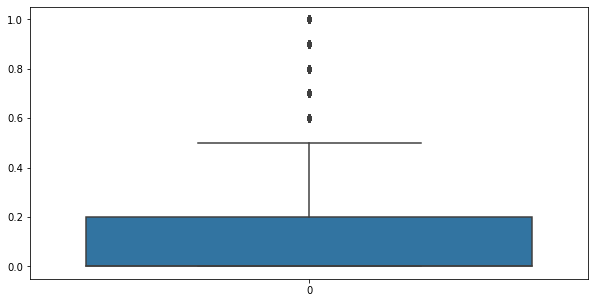

In [32]:
#Box Plot
plt.figure(figsize=(10,5))
sns.boxplot(data=cs_data_set_0["HLD_TR_RATIO"])

In [33]:
#매도액 비중별 데이터 갯수
cs_data_set_0["HLD_TR_RATIO"].value_counts().sort_index()

0.0    323934
0.1     51022
0.2     35224
0.3     25417
0.4     19049
0.5     15209
0.6     11385
0.7      9089
0.8      7312
0.9      5939
1.0     36445
Name: HLD_TR_RATIO, dtype: int64

<AxesSubplot:xlabel='HLD_TR_RATIO', ylabel='count'>

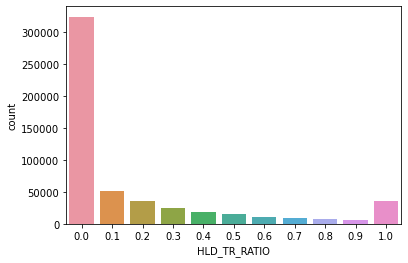

In [34]:
#막대 그래프
sns.countplot(x="HLD_TR_RATIO", data=cs_data_set_0)

▲ 값들이 0.0에 많이 몰려 있음.

<p style="font-size:20px; font-style:italic">CASH_AST</p>

<AxesSubplot:>

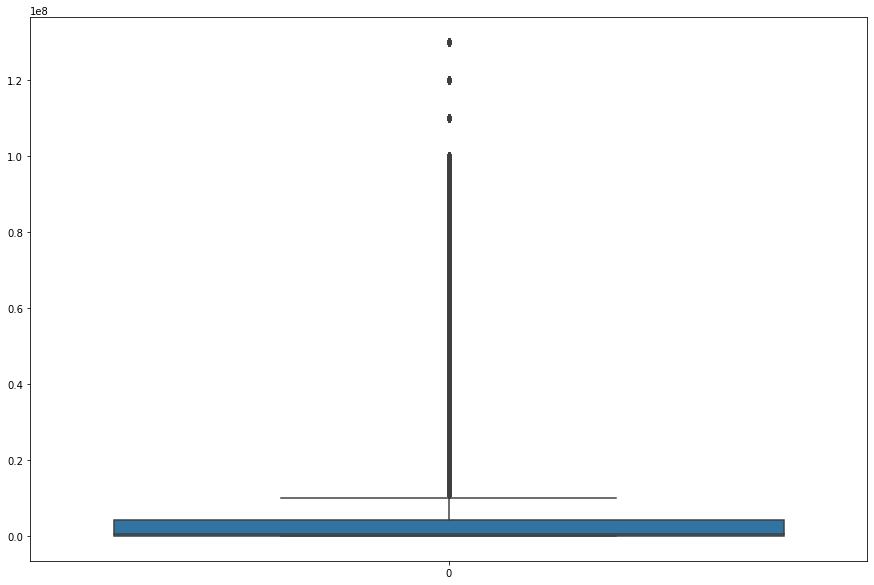

In [35]:
#Box Plot
plt.figure(figsize=(15,10))
sns.boxplot(data=cs_data_set_0["CASH_AST_M4"])

In [36]:
#값이 큰 순으로 정렬
sorted(cs_data_set_0["CASH_AST_M4"], reverse=True)

[130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 130000000.0,
 13000

In [37]:
cs_data_set_0["CASH_AST_M4"].value_counts().sort_index()

12.0           5228
13.0            215
14.0            123
15.0            116
16.0            115
               ... 
99000000.0      132
100000000.0    1248
110000000.0     912
120000000.0     769
130000000.0    6952
Name: CASH_AST_M4, Length: 632, dtype: int64

<AxesSubplot:xlabel='CASH_AST_M4', ylabel='count'>

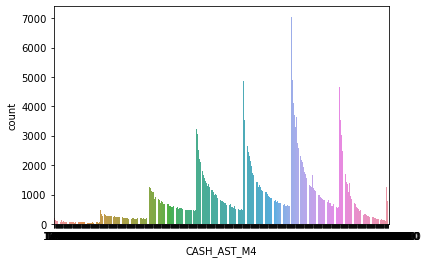

In [38]:
#막대 그래프
sns.countplot(x="CASH_AST_M4", data=cs_data_set_0)

▲ 특정 패턴을 보이긴 하지만 그 주기가 무엇인지 정확히 알기는 어려움.

(array([473268.,  27098.,  12188.,   7171.,   4375.,   2870.,   2121.,
          2301.,    912.,   7721.]),
 array([1.20000000e+01, 1.30000108e+07, 2.60000096e+07, 3.90000084e+07,
        5.20000072e+07, 6.50000060e+07, 7.80000048e+07, 9.10000036e+07,
        1.04000002e+08, 1.17000001e+08, 1.30000000e+08]),
 <BarContainer object of 10 artists>)

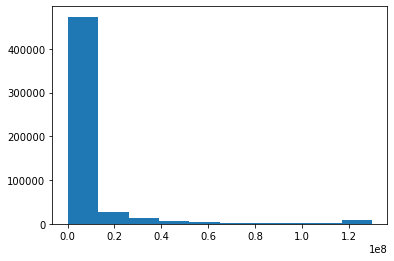

In [39]:
#히스토그램
plt.hist(cs_data_set_0["CASH_AST_M4"])

<p style="font-size:20px; font-style:italic">DMST_AST_EVAL</p>

<AxesSubplot:>

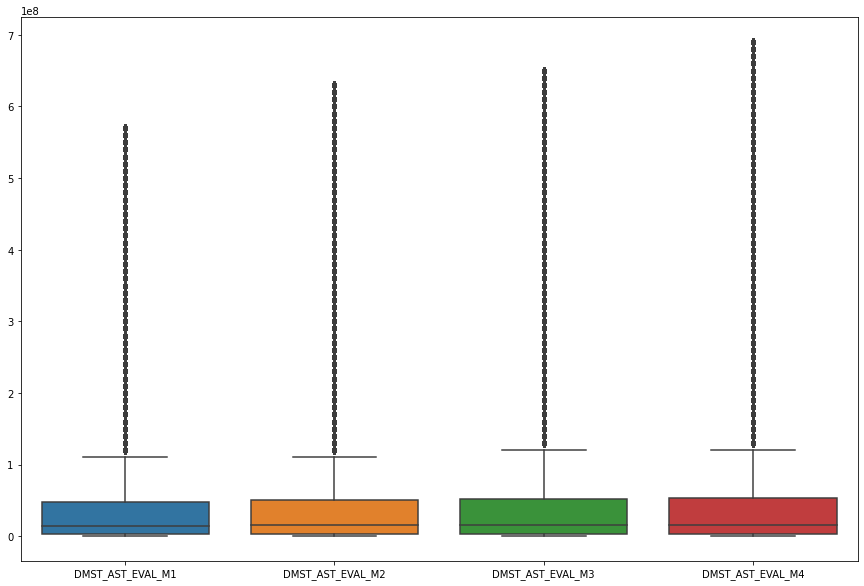

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(data=cs_data_set_0[DMST_AST_EVAL])

In [41]:
DMST_AST_EVAL_99=cs_data_set_0[DMST_AST_EVAL].quantile(0.99)
DMST_AST_EVAL_99

DMST_AST_EVAL_M1    570000000.0
DMST_AST_EVAL_M2    630000000.0
DMST_AST_EVAL_M3    650000000.0
DMST_AST_EVAL_M4    690000000.0
Name: 0.99, dtype: float64

In [42]:
cs_data_set_0[cs_data_set_0[DMST_AST_EVAL]>DMST_AST_EVAL_99].count()

HLD_TR_RATIO        0
CASH_AST_M4         0
DMST_AST_EVAL_M1    0
DMST_AST_EVAL_M2    0
DMST_AST_EVAL_M3    0
DMST_AST_EVAL_M4    0
DMST_AST_PCHS_M1    0
DMST_AST_PCHS_M2    0
DMST_AST_PCHS_M3    0
DMST_AST_PCHS_M4    0
OVST_AST_EVAL_M1    0
OVST_AST_EVAL_M2    0
OVST_AST_EVAL_M3    0
OVST_AST_EVAL_M4    0
OVST_AST_PCHS_M1    0
OVST_AST_PCHS_M2    0
OVST_AST_PCHS_M3    0
OVST_AST_PCHS_M4    0
EVAL_M1             0
PCHS_M1             0
EVAL_M2             0
PCHS_M2             0
EVAL_M3             0
PCHS_M3             0
EVAL_M4             0
PCHS_M4             0
LONG                0
SHORT               0
dtype: int64

<p style="font-size:20px; font-style:italic">DMST_AST_PCHS</p>

<AxesSubplot:>

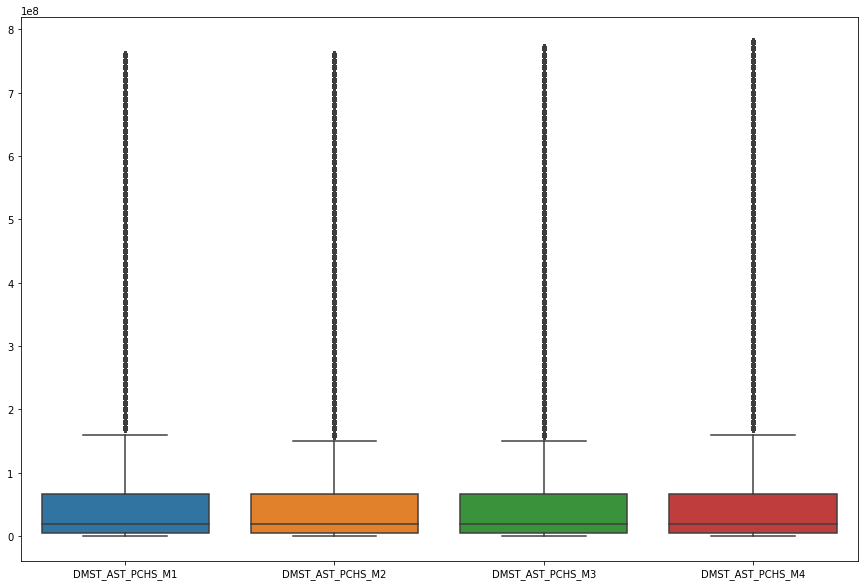

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(data=cs_data_set_0[DMST_AST_PCHS])

In [44]:
DMST_AST_PCHS_99=cs_data_set_0[DMST_AST_PCHS].quantile(0.99)
DMST_AST_PCHS_99

DMST_AST_PCHS_M1    760000000.0
DMST_AST_PCHS_M2    760000000.0
DMST_AST_PCHS_M3    770000000.0
DMST_AST_PCHS_M4    780000000.0
Name: 0.99, dtype: float64

In [45]:
cs_data_set_0[cs_data_set_0[DMST_AST_PCHS]>DMST_AST_PCHS_99].count()

HLD_TR_RATIO        0
CASH_AST_M4         0
DMST_AST_EVAL_M1    0
DMST_AST_EVAL_M2    0
DMST_AST_EVAL_M3    0
DMST_AST_EVAL_M4    0
DMST_AST_PCHS_M1    0
DMST_AST_PCHS_M2    0
DMST_AST_PCHS_M3    0
DMST_AST_PCHS_M4    0
OVST_AST_EVAL_M1    0
OVST_AST_EVAL_M2    0
OVST_AST_EVAL_M3    0
OVST_AST_EVAL_M4    0
OVST_AST_PCHS_M1    0
OVST_AST_PCHS_M2    0
OVST_AST_PCHS_M3    0
OVST_AST_PCHS_M4    0
EVAL_M1             0
PCHS_M1             0
EVAL_M2             0
PCHS_M2             0
EVAL_M3             0
PCHS_M3             0
EVAL_M4             0
PCHS_M4             0
LONG                0
SHORT               0
dtype: int64

<p style="font-size:20px; font-style:italic">OVST_AST_EVAL</p>

<AxesSubplot:>

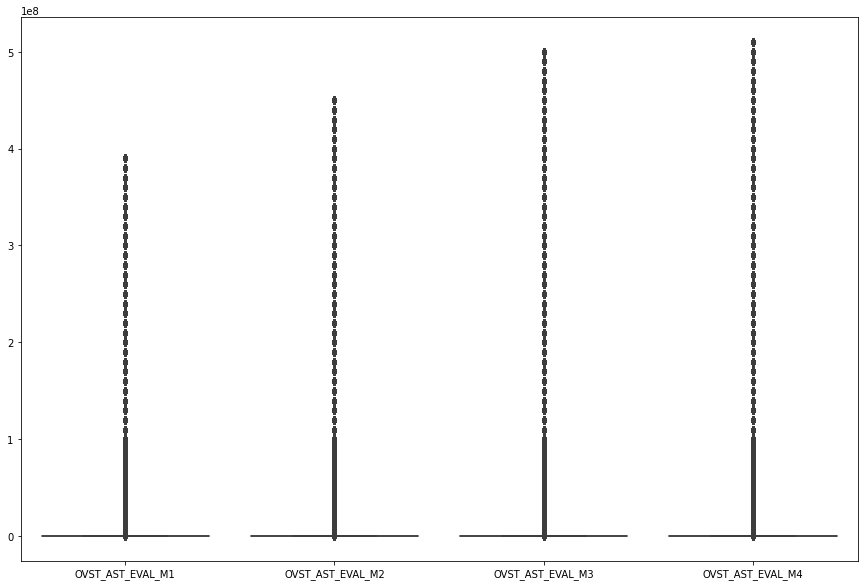

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(data=cs_data_set_0[OVST_AST_EVAL])

In [47]:
OVST_AST_EVAL_99=cs_data_set_0[OVST_AST_EVAL].quantile(0.99)
OVST_AST_EVAL_99

OVST_AST_EVAL_M1    140000000.0
OVST_AST_EVAL_M2    160000000.0
OVST_AST_EVAL_M3    180000000.0
OVST_AST_EVAL_M4    180000000.0
Name: 0.99, dtype: float64

In [48]:
cs_data_set_0[cs_data_set_0[OVST_AST_EVAL]>OVST_AST_EVAL_99].count()

HLD_TR_RATIO           0
CASH_AST_M4            0
DMST_AST_EVAL_M1       0
DMST_AST_EVAL_M2       0
DMST_AST_EVAL_M3       0
DMST_AST_EVAL_M4       0
DMST_AST_PCHS_M1       0
DMST_AST_PCHS_M2       0
DMST_AST_PCHS_M3       0
DMST_AST_PCHS_M4       0
OVST_AST_EVAL_M1    5270
OVST_AST_EVAL_M2    5315
OVST_AST_EVAL_M3    5333
OVST_AST_EVAL_M4    5390
OVST_AST_PCHS_M1       0
OVST_AST_PCHS_M2       0
OVST_AST_PCHS_M3       0
OVST_AST_PCHS_M4       0
EVAL_M1                0
PCHS_M1                0
EVAL_M2                0
PCHS_M2                0
EVAL_M3                0
PCHS_M3                0
EVAL_M4                0
PCHS_M4                0
LONG                   0
SHORT                  0
dtype: int64

<p style="font-size:20px; font-style:italic">OVST_AST_PCHS</p>

<AxesSubplot:>

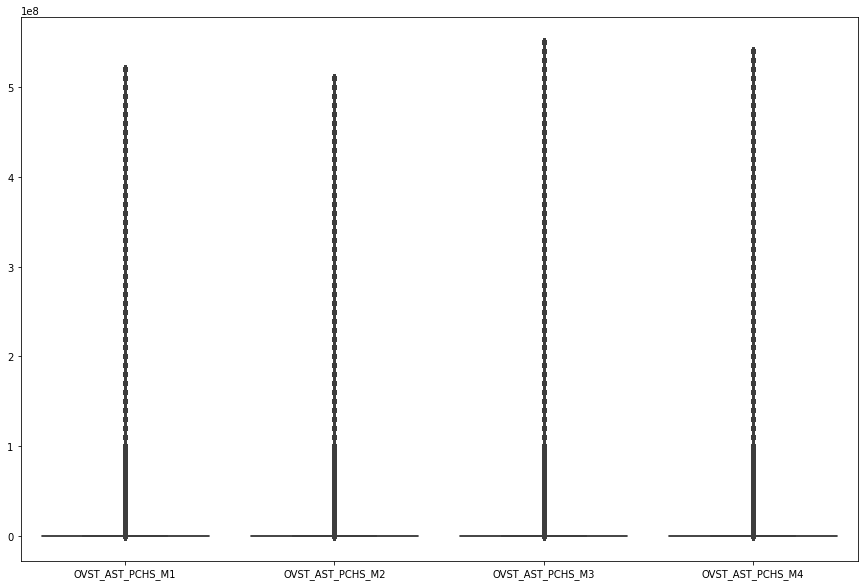

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(data=cs_data_set_0[OVST_AST_PCHS])

In [50]:
OVST_AST_PCHS_99=cs_data_set_0[OVST_AST_PCHS].quantile(0.99)
OVST_AST_PCHS_99

OVST_AST_PCHS_M1    200000000.0
OVST_AST_PCHS_M2    190000000.0
OVST_AST_PCHS_M3    210000000.0
OVST_AST_PCHS_M4    210000000.0
Name: 0.99, dtype: float64

In [51]:
cs_data_set_0[cs_data_set_0[OVST_AST_PCHS]>OVST_AST_PCHS_99].count()

HLD_TR_RATIO           0
CASH_AST_M4            0
DMST_AST_EVAL_M1       0
DMST_AST_EVAL_M2       0
DMST_AST_EVAL_M3       0
DMST_AST_EVAL_M4       0
DMST_AST_PCHS_M1       0
DMST_AST_PCHS_M2       0
DMST_AST_PCHS_M3       0
DMST_AST_PCHS_M4       0
OVST_AST_EVAL_M1       0
OVST_AST_EVAL_M2       0
OVST_AST_EVAL_M3       0
OVST_AST_EVAL_M4       0
OVST_AST_PCHS_M1    5232
OVST_AST_PCHS_M2    5397
OVST_AST_PCHS_M3    5306
OVST_AST_PCHS_M4    5179
EVAL_M1                0
PCHS_M1                0
EVAL_M2                0
PCHS_M2                0
EVAL_M3                0
PCHS_M3                0
EVAL_M4                0
PCHS_M4                0
LONG                   0
SHORT                  0
dtype: int64

## (3-2) 파생변수 생성: (수익률) = rate of return
<P style="font-weight:bold ;font-size:15px;font-style:italic;background-color:orange;text-align:center">수익률 = (AST_EVAL - AST_PCHS) / AST_PCHS * 100</P>

<P style="font-weight:bold ;font-size:15px;font-style:italic;background-color:orange;text-align:center">수익률 = { (DMST_AST_EVAL+OVST_AST_EVAL) - (DMST_AST_PCHS + OVST_AST_PCHS) } / (DMST_AST_PCHS + OVST_AST_PCHS) * 100</P>

<P style="font-style:italic; color:orange;font-weight:bold">국내/해외주식을 그 달 매입한 기록이 없다면 수익률이 결측치로 나올 수 있다.</P>

In [52]:
cs_data_set_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HLD_TR_RATIO      540025 non-null  float64
 1   CASH_AST_M4       540025 non-null  float64
 2   DMST_AST_EVAL_M1  540025 non-null  float64
 3   DMST_AST_EVAL_M2  540025 non-null  float64
 4   DMST_AST_EVAL_M3  540025 non-null  float64
 5   DMST_AST_EVAL_M4  540025 non-null  float64
 6   DMST_AST_PCHS_M1  540025 non-null  float64
 7   DMST_AST_PCHS_M2  540025 non-null  float64
 8   DMST_AST_PCHS_M3  540025 non-null  float64
 9   DMST_AST_PCHS_M4  540025 non-null  float64
 10  OVST_AST_EVAL_M1  540025 non-null  float64
 11  OVST_AST_EVAL_M2  540025 non-null  float64
 12  OVST_AST_EVAL_M3  540025 non-null  float64
 13  OVST_AST_EVAL_M4  540025 non-null  float64
 14  OVST_AST_PCHS_M1  540025 non-null  float64
 15  OVST_AST_PCHS_M2  540025 non-null  float64
 16  OVST_AST_PCHS_M3  54

In [53]:
cs_data_set_0.head()

,HLD_TR_RATIO,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,DMST_AST_PCHS_M2,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,...,EVAL_M1,PCHS_M1,EVAL_M2,PCHS_M2,EVAL_M3,PCHS_M3,EVAL_M4,PCHS_M4,LONG,SHORT
0,0.0,2100000.0,10000000.0,11000000.0,11000000.0,4600000.0,9700000.0,9700000.0,9700000.0,4400000.0,...,10000000.0,9700000.0,11000000.0,9700000.0,11000000.0,9700000.0,4600000.0,4400000.0,1,0
1,0.0,9100000.0,78000000.0,76000000.0,70000000.0,50000000.0,100000000.0,91000000.0,75000000.0,55000000.0,...,78000000.0,100000000.0,76000000.0,91000000.0,70000000.0,75000000.0,50000000.0,55000000.0,1,0
2,0.0,1000.0,29000000.0,31000000.0,30000000.0,35000000.0,52000000.0,51000000.0,50000000.0,50000000.0,...,32600000.0,61200000.0,36600000.0,61000000.0,37300000.0,61000000.0,42300000.0,61000000.0,1,0
3,0.0,51000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48000000.0,46000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.0,600000.0,220000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,...,220000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,1,0


In [54]:
#월별 수익률 계산
cs_data_set_0["RATE_OF_RETURN_M1"] = (cs_data_set_0["EVAL_M1"] - cs_data_set_0["PCHS_M1"]) / cs_data_set_0["PCHS_M1"] * 100
cs_data_set_0["RATE_OF_RETURN_M2"] = (cs_data_set_0["EVAL_M2"] - cs_data_set_0["PCHS_M2"]) / cs_data_set_0["PCHS_M2"] * 100
cs_data_set_0["RATE_OF_RETURN_M3"] = (cs_data_set_0["EVAL_M3"] - cs_data_set_0["PCHS_M3"]) / cs_data_set_0["PCHS_M3"] * 100
cs_data_set_0["RATE_OF_RETURN_M4"] = (cs_data_set_0["EVAL_M4"] - cs_data_set_0["PCHS_M4"]) / cs_data_set_0["PCHS_M4"] * 100
cs_data_set_0

,HLD_TR_RATIO,CASH_AST_M4,DMST_AST_EVAL_M1,DMST_AST_EVAL_M2,DMST_AST_EVAL_M3,DMST_AST_EVAL_M4,DMST_AST_PCHS_M1,DMST_AST_PCHS_M2,DMST_AST_PCHS_M3,DMST_AST_PCHS_M4,...,EVAL_M3,PCHS_M3,EVAL_M4,PCHS_M4,LONG,SHORT,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4
0,0.0,2100000.0,10000000.0,11000000.0,11000000.0,4600000.0,9700000.0,9700000.0,9700000.0,4400000.0,...,11000000.0,9700000.0,4600000.0,4400000.0,1,0,3.092784,13.402062,13.402062,4.545455
1,0.0,9100000.0,78000000.0,76000000.0,70000000.0,50000000.0,100000000.0,91000000.0,75000000.0,55000000.0,...,70000000.0,75000000.0,50000000.0,55000000.0,1,0,-22.000000,-16.483516,-6.666667,-9.090909
2,0.0,1000.0,29000000.0,31000000.0,30000000.0,35000000.0,52000000.0,51000000.0,50000000.0,50000000.0,...,37300000.0,61000000.0,42300000.0,61000000.0,1,0,-46.732026,-40.000000,-38.852459,-30.655738
3,0.0,51000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,4.347826,NaN,NaN,NaN
4,0.0,600000.0,220000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,...,240000.0,240000.0,240000.0,240000.0,1,0,-8.333333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,72000.0,25000000.0,27000000.0,26000000.0,27000000.0,34000000.0,33000000.0,33000000.0,33000000.0,...,26000000.0,33000000.0,27000000.0,33000000.0,1,0,-26.470588,-18.181818,-21.212121,-18.181818
540021,1.0,4700000.0,29000000.0,28000000.0,29000000.0,26000000.0,77000000.0,75000000.0,75000000.0,75000000.0,...,29000000.0,75000000.0,26000000.0,75000000.0,0,1,-62.337662,-62.666667,-61.333333,-65.333333
540022,0.1,870000.0,25000000.0,28000000.0,33000000.0,31000000.0,25000000.0,25000000.0,31000000.0,31000000.0,...,33000000.0,31000000.0,31000000.0,31000000.0,0,1,0.000000,12.000000,6.451613,0.000000
540023,0.2,330000.0,170000000.0,180000000.0,180000000.0,190000000.0,240000000.0,240000000.0,240000000.0,250000000.0,...,180000000.0,240000000.0,190000000.0,250000000.0,0,1,-29.166667,-25.000000,-25.000000,-24.000000


In [55]:
cs_data_set_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HLD_TR_RATIO       540025 non-null  float64
 1   CASH_AST_M4        540025 non-null  float64
 2   DMST_AST_EVAL_M1   540025 non-null  float64
 3   DMST_AST_EVAL_M2   540025 non-null  float64
 4   DMST_AST_EVAL_M3   540025 non-null  float64
 5   DMST_AST_EVAL_M4   540025 non-null  float64
 6   DMST_AST_PCHS_M1   540025 non-null  float64
 7   DMST_AST_PCHS_M2   540025 non-null  float64
 8   DMST_AST_PCHS_M3   540025 non-null  float64
 9   DMST_AST_PCHS_M4   540025 non-null  float64
 10  OVST_AST_EVAL_M1   540025 non-null  float64
 11  OVST_AST_EVAL_M2   540025 non-null  float64
 12  OVST_AST_EVAL_M3   540025 non-null  float64
 13  OVST_AST_EVAL_M4   540025 non-null  float64
 14  OVST_AST_PCHS_M1   540025 non-null  float64
 15  OVST_AST_PCHS_M2   540025 non-null  float64
 16  OV

In [56]:
#수익률에서 결측치 갯수 확인
cs_data_set_0[RATE_OF_RETURN].isna().sum()

RATE_OF_RETURN_M1    20536
RATE_OF_RETURN_M2    23694
RATE_OF_RETURN_M3    23646
RATE_OF_RETURN_M4    25967
dtype: int64

In [57]:
#M1에서 결측인 경우의 데이터프레임
cs_data_set_0[cs_data_set_0["RATE_OF_RETURN_M1"].isna()][["EVAL_M1","PCHS_M1","RATE_OF_RETURN_M1"]]

,EVAL_M1,PCHS_M1,RATE_OF_RETURN_M1
12,0.0,0.0,NaN
42,0.0,0.0,NaN
50,0.0,0.0,NaN
68,0.0,0.0,NaN
129,0.0,0.0,NaN
...,...,...,...
539902,0.0,0.0,NaN
539972,0.0,0.0,NaN
539979,0.0,0.0,NaN
540006,0.0,0.0,NaN


In [58]:
#M2에서 결측인 경우의 데이터프레임
cs_data_set_0[cs_data_set_0["RATE_OF_RETURN_M2"].isna()][["EVAL_M2","PCHS_M2","RATE_OF_RETURN_M2"]]

,EVAL_M2,PCHS_M2,RATE_OF_RETURN_M2
3,0.0,0.0,NaN
6,0.0,0.0,NaN
12,0.0,0.0,NaN
31,0.0,0.0,NaN
38,0.0,0.0,NaN
...,...,...,...
539942,0.0,0.0,NaN
539943,0.0,0.0,NaN
539979,0.0,0.0,NaN
540006,0.0,0.0,NaN


In [59]:
#M3에서 결측인 경우의 데이터프레임
cs_data_set_0[cs_data_set_0["RATE_OF_RETURN_M3"].isna()][["EVAL_M3","PCHS_M3","RATE_OF_RETURN_M3"]]

,EVAL_M3,PCHS_M3,RATE_OF_RETURN_M3
3,0.0,0.0,NaN
7,0.0,0.0,NaN
12,0.0,0.0,NaN
31,0.0,0.0,NaN
36,0.0,0.0,NaN
...,...,...,...
539902,0.0,0.0,NaN
539924,0.0,0.0,NaN
539979,0.0,0.0,NaN
540006,0.0,0.0,NaN


In [60]:
#M4에서 결측인 경우의 데이터프레임
cs_data_set_0[cs_data_set_0["RATE_OF_RETURN_M4"].isna()][["EVAL_M4","PCHS_M4","RATE_OF_RETURN_M4"]]

,EVAL_M4,PCHS_M4,RATE_OF_RETURN_M4
3,0.0,0.0,NaN
6,0.0,0.0,NaN
12,0.0,0.0,NaN
31,0.0,0.0,NaN
36,0.0,0.0,NaN
...,...,...,...
539924,0.0,0.0,NaN
539942,0.0,0.0,NaN
539954,0.0,0.0,NaN
539979,0.0,0.0,NaN


## (3-3) *수익률에서 NaN이 나오는 경우: 평가액(EVAL)과 매입액(PCHS)이 모두 '0'인 경우*
이 경우, 수익률을 '0'으로 재설정함.

In [61]:
# 결측치를 0으로 바꿔줌
cs_data_set_0 = cs_data_set_0.fillna(0)
cs_data_set_0[RATE_OF_RETURN].isna().sum()

RATE_OF_RETURN_M1    0
RATE_OF_RETURN_M2    0
RATE_OF_RETURN_M3    0
RATE_OF_RETURN_M4    0
dtype: int64

In [62]:
cs_data_set_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HLD_TR_RATIO       540025 non-null  float64
 1   CASH_AST_M4        540025 non-null  float64
 2   DMST_AST_EVAL_M1   540025 non-null  float64
 3   DMST_AST_EVAL_M2   540025 non-null  float64
 4   DMST_AST_EVAL_M3   540025 non-null  float64
 5   DMST_AST_EVAL_M4   540025 non-null  float64
 6   DMST_AST_PCHS_M1   540025 non-null  float64
 7   DMST_AST_PCHS_M2   540025 non-null  float64
 8   DMST_AST_PCHS_M3   540025 non-null  float64
 9   DMST_AST_PCHS_M4   540025 non-null  float64
 10  OVST_AST_EVAL_M1   540025 non-null  float64
 11  OVST_AST_EVAL_M2   540025 non-null  float64
 12  OVST_AST_EVAL_M3   540025 non-null  float64
 13  OVST_AST_EVAL_M4   540025 non-null  float64
 14  OVST_AST_PCHS_M1   540025 non-null  float64
 15  OVST_AST_PCHS_M2   540025 non-null  float64
 16  OV

In [63]:
#수익률에서의 기본 통계량
cs_data_set_0[RATE_OF_RETURN].describe()

,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4
count,540025.000000,540025.000000,540025.000000,540025.000000
mean,-23.713908,-17.240556,-16.023279,-13.268488
std,81.276681,74.292181,94.827468,122.086455
min,-99.700000,-99.989211,-99.989351,-99.989487
25%,-36.507937,-30.000000,-29.230769,-27.777778
50%,-25.000000,-17.241379,-16.071429,-13.636364
75%,-12.000000,-4.285714,-3.333333,0.000000
max,37900.000000,31900.000000,32553.061224,43986.021505


▲ 코스닥(KOSDAQ)이 2022년 12월부터 2023년 3월까지 점차 회복하는 양상을 가지고있는데, 이에 따라 평균 수익률도 회복되는걸 확인 할 수 있음.

<AxesSubplot:>

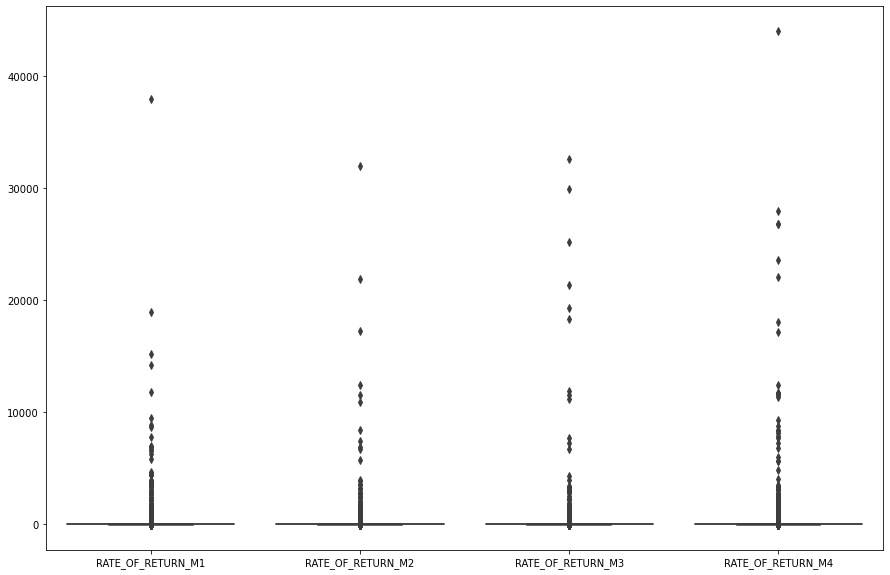

In [64]:
#수익률의 Box Plot
plt.figure(figsize=(15,10))
sns.boxplot(data=cs_data_set_0[RATE_OF_RETURN])

## (3-4) 최종 데이터프레임 생성
- 불필요한 변수들은 제거
- 데이터프레임을 csv파일로 저장

In [65]:
cs_data_set_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HLD_TR_RATIO       540025 non-null  float64
 1   CASH_AST_M4        540025 non-null  float64
 2   DMST_AST_EVAL_M1   540025 non-null  float64
 3   DMST_AST_EVAL_M2   540025 non-null  float64
 4   DMST_AST_EVAL_M3   540025 non-null  float64
 5   DMST_AST_EVAL_M4   540025 non-null  float64
 6   DMST_AST_PCHS_M1   540025 non-null  float64
 7   DMST_AST_PCHS_M2   540025 non-null  float64
 8   DMST_AST_PCHS_M3   540025 non-null  float64
 9   DMST_AST_PCHS_M4   540025 non-null  float64
 10  OVST_AST_EVAL_M1   540025 non-null  float64
 11  OVST_AST_EVAL_M2   540025 non-null  float64
 12  OVST_AST_EVAL_M3   540025 non-null  float64
 13  OVST_AST_EVAL_M4   540025 non-null  float64
 14  OVST_AST_PCHS_M1   540025 non-null  float64
 15  OVST_AST_PCHS_M2   540025 non-null  float64
 16  OV

In [66]:
#필요한 변수들만 추출
cs_data_set_final = cs_data_set_0[["HLD_TR_RATIO","LONG","SHORT","CASH_AST_M4","RATE_OF_RETURN_M1","RATE_OF_RETURN_M2","RATE_OF_RETURN_M3","RATE_OF_RETURN_M4"]]
cs_data_set_final

,HLD_TR_RATIO,LONG,SHORT,CASH_AST_M4,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4
0,0.0,1,0,2100000.0,3.092784,13.402062,13.402062,4.545455
1,0.0,1,0,9100000.0,-22.000000,-16.483516,-6.666667,-9.090909
2,0.0,1,0,1000.0,-46.732026,-40.000000,-38.852459,-30.655738
3,0.0,1,0,51000000.0,4.347826,0.000000,0.000000,0.000000
4,0.0,1,0,600000.0,-8.333333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
540020,0.0,1,0,72000.0,-26.470588,-18.181818,-21.212121,-18.181818
540021,1.0,0,1,4700000.0,-62.337662,-62.666667,-61.333333,-65.333333
540022,0.1,0,1,870000.0,0.000000,12.000000,6.451613,0.000000
540023,0.2,0,1,330000.0,-29.166667,-25.000000,-25.000000,-24.000000


In [67]:
cs_data_set_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HLD_TR_RATIO       540025 non-null  float64
 1   LONG               540025 non-null  int64  
 2   SHORT              540025 non-null  int64  
 3   CASH_AST_M4        540025 non-null  float64
 4   RATE_OF_RETURN_M1  540025 non-null  float64
 5   RATE_OF_RETURN_M2  540025 non-null  float64
 6   RATE_OF_RETURN_M3  540025 non-null  float64
 7   RATE_OF_RETURN_M4  540025 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 33.0 MB


In [68]:
#cs_data_set_final을 csv파일로 저장
cs_data_set_final.to_csv("../../../data/FINALDATA/cs_data_set_final.csv", index=False)

# 결론

## 최종적으로 cs_data_set_final 이라는 전처리가 완료된 데이터프레임 추출

<p style="font-weight:bold;font-style:italic;background-color:orange;text-align:center">주요 전처리 내용은 아래와 같다.</p>
<ol> 
    <li style="font-weight:bold;font-style:italic;">고객 군집화는 4개월 단위로, 수익률 계산은 한달 단위로 업데이트하기로 결정</li>
    a. HLD_TR_RATIO의 데이터 범위 문제로 고객 군집화의 한 달 단위의 업데이트는 무리라고 판단함.<br/>
    b. 수익률 계산은 한 달 단위로 업데이트가 가능함.<br/>
    <li style="font-weight:bold;font-style:italic;">클러스터링과 수익률 계산에 필요한 변수들</li>
    a. 클러스터링: HLD_TR_RATIO, CASH_AST_M4<br/>
    b. 수익률 계산: DMST_AST_EVAL(M1~M4), DMST_AST_PCHS(M1~M4), OVST_AST_EVAL(M1~M4), OVST_AST_PCHS(M1~M4)<br/>
    <li style="font-weight:bold;font-style:italic;">추가로 생성된 변수들</li>
    a. LONG, SHORT: HLD_TR_RATIO의 값을 기반으로 만든 더미변수<br/>
    => HLD_TR_RATIO에서 값이 0.0인 경우를 장타, 이외의 경우를 단타로 분류하고, '0'과 '1'로 encoding(수치화)함.<br/>
    b. RATE_OF_RETURN(M1~M4): 월별 수익률 계산한 값<br/>
    => 수익률 = (AST_EVAL - AST_PCHS) / AST-PCHS * 100
    <li style="font-weight:bold;font-style:italic;">결측치 처리</li>
    (STEP 1) HLD_TR_RATIO와 CASH_AST_M4에서의 결측치는 모두 제거<br/>
    (STEP 2) 남은 결측치는 모두 '0'으로 처리<br/>
    (STEP 3) 월별로 (평가액 O, 매입액 X), (평가액 X, 매입액 O)인 경우는 비정상적인 경우로 간주하여 제거<br/>
    *결측치로 제거된 경우들은 언랭 그룹(데이터가 부족해서 그룹화할 수 없는 짜투리 그룹)으로 분류된 것으로 보겠음.<br/>
    *미래에셋 측에서 이미 전처리가 된 데이터이고, NULL이거나 '0'인 데이터를 결측치(NaN)로 처리했음을 근거로 함.<br/>
    <li style="font-weight:bold;font-style:italic;">이상치 확인</li>
    a. CASH_AST_M4의 이상치는 유의미하다고 판단하여 별다른 처리는 하지 않음.<br/>
    => 필요하면 클러스터링 단계에서 이상치 처리할 예정.<br/>
    b. 수익률(RATE_OF_RETURN)은 어차피 클러스터링에 사용되지 않고, 리더보드에서만 표기될 값이므로 이상치들도 그냥 둠.<br/>
    
<ol>